# Analyse des Chances de Médailles aux Jeux Olympiques d'Été 2024 à Paris

## Introduction

Dans cette analyse, nous explorons le potentiel de chaque pays inscrit pour remporter des médailles aux Jeux Olympiques d'été 2024 à Paris. En nous basant sur le jeu de données historique "120 years of Olympic history: athletes and results", nous tenterons de prédire les performances des pays participants. Ce travail utilise également le fichier `dictionary.csv` pour enrichir notre compréhension des données.

<img src="https://imgresizer.eurosport.com/unsafe/1200x0/filters:format(jpeg)/origin-imgresizer.eurosport.com/2023/03/10/3650996-74329048-2560-1440.jpg" width="500">


# 2. Exploration des données

Dans cette section, nous avons exploré le jeu de données "120 years of Olympic history: athletes and results". Nous avons analysé les différents champs disponibles dans ce jeu de données, y compris les athlètes, les disciplines, les pays participants et les médailles remportées.

Nous avons utilisé des méthodes de visualisation pour comprendre les distributions des médailles par pays et les tendances historiques. Nous avons également calculé les totaux de médailles par années, par pays, et par genre des athlètes.

Nous avons comparé nos résultats à des données trouvées sur le web, notamment sur la page Wikipedia "Tableau des médailles olympiques par nation" (https://fr.wikipedia.org/wiki/Tableau_des_m%C3%A9dailles_olympiques_par_nation).

Enfin, nous avons tiré des conclusions concernant le calcul des médailles par pays. Nous avons pris en compte les sports collectifs et les évolutions des dénominations des pays. Nous avons constaté que le nombre de médailles remportées par un pays peut être influencé par plusieurs facteurs, y compris le nombre d'athlètes participants, la popularité de certains sports dans le pays, et les changements politiques qui peuvent affecter la dénomination du pays.


In [31]:
import pandas as pd

df = pd.read_csv('athlete_events.csv')
df.info() #inforamation a propos des données

df_NOC = pd.read_csv('noc_regions.csv')
df_NOC.info()

Dictionary = pd.read_csv('dictionary.csv')
Dictionary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0 

# Aperçu des Structures de Données

Ce document fournit un aperçu des structures de données contenues dans les fichiers CSV fournis.

## Régions NOC (`noc_regions.csv`)

- **NOC** : Codes des Comités Nationaux Olympiques.
- **Region** : Nom de la région ou du pays correspondant.
- **Notes** : Notes supplémentaires, telles que des noms alternatifs ou des informations historiques.

## Dictionnaire (`dictionary.csv`)

- **Country** : Noms des pays.
- **Code** : Abréviations ou codes pour les pays, qui semblent être en corrélation avec les codes **NOC**.
- **Population** : Population du pays.
- **GDP per Capita** : PIB par habitant du pays.

## Événements des Athlètes (`athlete_events.csv`)

- **ID** : Identifiant unique pour chaque athlète.
- **Name** : Nom de l'athlète.
- **Sex** : Sexe de l'athlète (M ou F).
- **Age** : Âge de l'athlète au moment des Jeux Olympiques.
- **Height** : Taille de l'athlète en centimètres.
- **Weight** : Poids de l'athlète en kilogrammes.
- **Team** : Équipe ou pays représenté par l'athlète.
- **NOC** : Code du Comité National Olympique correspondant à l'équipe.
- **Games** : L'année et la saison des Jeux Olympiques.
- **Year** : Année des Jeux Olympiques.
- **Season** : Saison des Jeux Olympiques (**Summer** ou **Winter**).
- **City** : Ville où se sont tenus les Jeux Olympiques.
- **Sport** : Sport dans lequel l'athlète a concouru.
- **Event** : Épreuve spécifique au sein du sport.
- **Medal** : Médaille remportée par l'athlète, le cas échéant.


In [36]:

# Analyse des données en fonction des instructions données pour rendre la sortie plus lisible

# Utilisation de athlete_events_df pour cette analyse car 'df' n'est pas défini dans ce contexte
athletes = df['Name'].unique()
disciplines = df['Sport'].unique()
pays = df['Team'].unique()
medailles = df['Medal'].dropna().unique() # Exclusion de NaN pour le décompte des médailles

# Création de sorties plus lisibles
athletes_output = f"Nombre d'athlètes uniques : {len(athletes)}"
disciplines_output = f"Nombre de disciplines : {len(disciplines)}"
pays_output = f"Nombre de pays participants : {len(pays)}"
medailles_output = f"Types de médailles gagnées : {', '.join(medailles)} (Total des types : {len(medailles)})"

athletes_output, disciplines_output, pays_output, medailles_output



("Nombre d'athlètes uniques : 134732",
 'Nombre de disciplines : 66',
 'Nombre de pays participants : 1184',
 'Types de médailles gagnées : Gold, Bronze, Silver (Total des types : 3)')

In [6]:
df.describe() #statistiques descriptives des données des athlètes depuis 1896 à 2016 (âge, taille, poids, etc.)

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


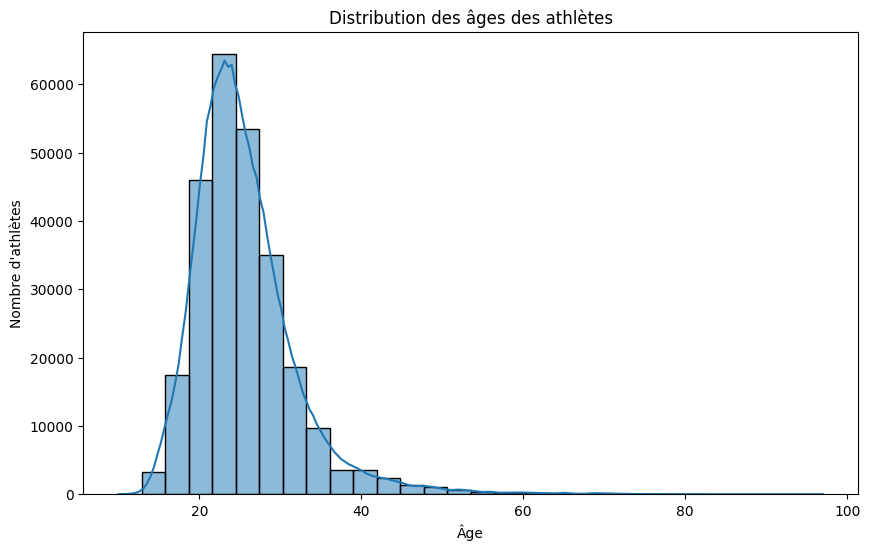

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Préparation des données
medals_by_country = df.dropna(subset=['Medal']).groupby('Team')['Medal'].count().sort_values(ascending=False).head(10)
participants_by_year = df.groupby('Year')['ID'].nunique()

# Distribution des âges des athlètes
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution des âges des athlètes')
plt.xlabel('Âge')
plt.ylabel('Nombre d\'athlètes')
plt.show()

# Assurez-vous d'avoir les données nécessaires pour créer un diagramme à barres empilées des médailles avant de l'exécuter,
# car cela nécessite un peu plus de préparation des données.


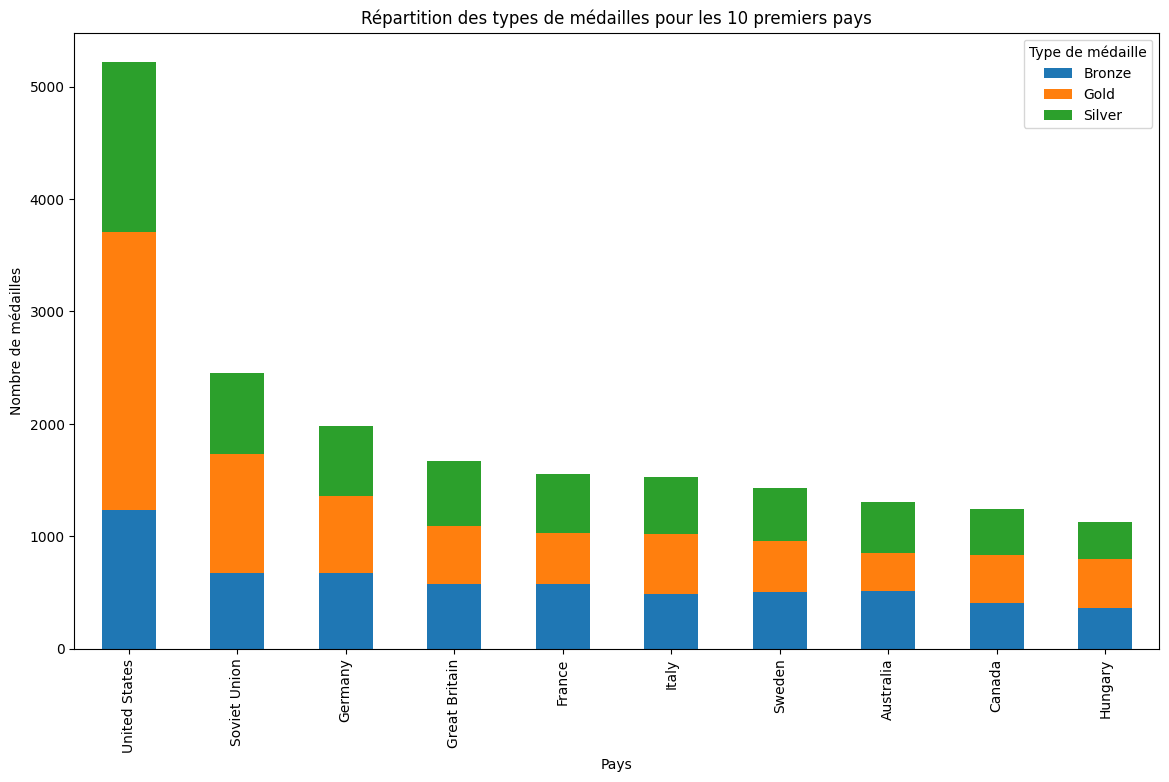

In [9]:
# Filtrer les lignes avec des médailles et compter les médailles par type et par pays
medals_by_type_country = df.dropna(subset=['Medal']).groupby(['Team', 'Medal']).size().unstack(fill_value=0)

# Calculer le total de médailles par pays pour obtenir les 10 premiers pays
medals_by_type_country['Total'] = medals_by_type_country.sum(axis=1)
top_countries = medals_by_type_country.sort_values('Total', ascending=False).head(10)

# Supprimer la colonne total pour la visualisation
top_countries = top_countries.drop(columns='Total')

# Visualisation
top_countries.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Répartition des types de médailles pour les 10 premiers pays')
plt.xlabel('Pays')
plt.ylabel('Nombre de médailles')
plt.legend(title='Type de médaille')
plt.show()


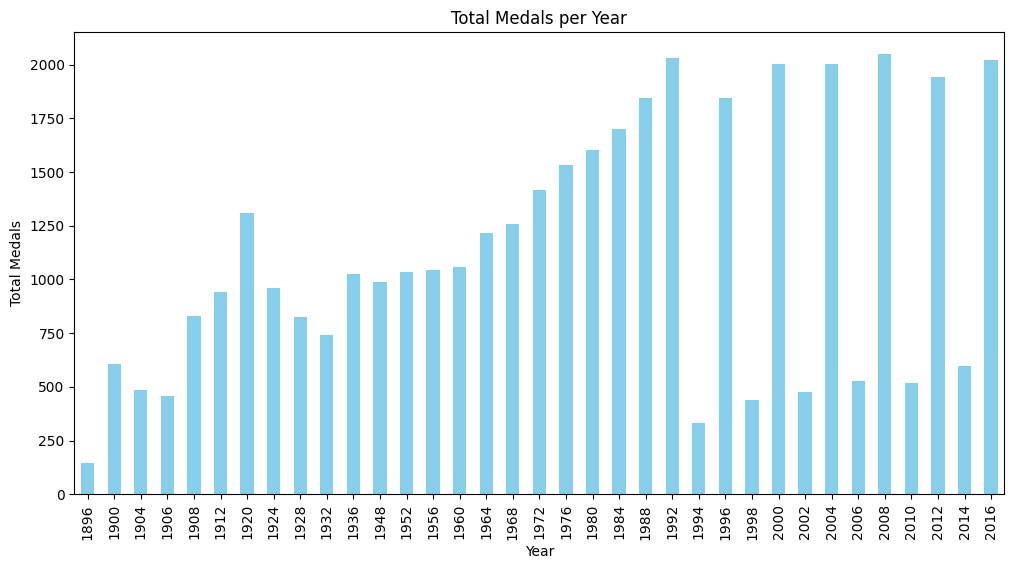

In [40]:
# Calculer le nombre total de médailles par année
medals_by_year = df.dropna(subset=['Medal']).groupby('Year')['Medal'].count()

# Visualiser le total de médailles par année
import matplotlib.pyplot as plt

# Assuming 'Year' and 'Medal' are columns in your dataframe 'df'
medals_by_year = df.dropna(subset=['Medal']).groupby('Year')['Medal'].count()

# Plotting
plt.figure(figsize=(12,6))
medals_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Medals per Year')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.show()


In [11]:
%pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [41]:
import pandas as pd
from tabulate import tabulate



# Filtre pour inclure uniquement les lignes avec des médailles
medal_data = df.dropna(subset=['Medal'])

# Compter les médailles par pays et par type
medal_counts = medal_data.groupby(['Team', 'Medal']).size().unstack(fill_value=0)

# Ajouter une colonne pour le total des médailles par pays
medal_counts['Total'] = medal_counts.sum(axis=1)

# Trier les pays par le nombre total de médailles
medal_counts_sorted = medal_counts.sort_values(by='Total', ascending=False)

# Afficher les résultats avec tabulate pour une meilleure lisibilité
print(tabulate(medal_counts_sorted[['Bronze', 'Silver', 'Gold', 'Total']], headers='keys', tablefmt='psql'))


Summer Games
+-------------------------------------------------+----------+----------+--------+---------+
| Team                                            |   Bronze |   Silver |   Gold |   Total |
|-------------------------------------------------+----------+----------+--------+---------|
| United States                                   |     1112 |     1241 |   2333 |    4686 |
| Soviet Union                                    |      596 |      635 |    830 |    2061 |
| Germany                                         |      610 |      513 |    564 |    1687 |
| Great Britain                                   |      541 |      576 |    481 |    1598 |
| France                                          |      502 |      485 |    421 |    1408 |
| Italy                                           |      425 |      467 |    492 |    1384 |
| Australia                                       |      504 |      450 |    336 |    1290 |
| Hungary                                         |      

In [42]:
# Filter for rows with medals
medal_data = df.dropna(subset=['Medal'])

# Separate data for summer and winter
summer_medal_data = medal_data[medal_data['Season'] == 'Summer']
winter_medal_data = medal_data[medal_data['Season'] == 'Winter']

# Count medals by country and type for summer
summer_medal_counts = summer_medal_data.groupby(['Team', 'Medal']).size().unstack(fill_value=0)

# Add a column for total medals by country for summer
summer_medal_counts['Total'] = summer_medal_counts.sum(axis=1)

# Sort countries by total number of medals for summer
summer_medal_counts_sorted = summer_medal_counts.sort_values(by='Total', ascending=False)

# Count medals by country and type for winter
winter_medal_counts = winter_medal_data.groupby(['Team', 'Medal']).size().unstack(fill_value=0)

# Add a column for total medals by country for winter
winter_medal_counts['Total'] = winter_medal_counts.sum(axis=1)

# Sort countries by total number of medals for winter
winter_medal_counts_sorted = winter_medal_counts.sort_values(by='Total', ascending=False)

# Display results with tabulate for better readability
print("Summer Games")
print(tabulate(summer_medal_counts_sorted[['Bronze', 'Silver', 'Gold', 'Total']], headers='keys', tablefmt='psql'))
print("\nWinter Games")
print(tabulate(winter_medal_counts_sorted[['Bronze', 'Silver', 'Gold', 'Total']], headers='keys', tablefmt='psql'))


Summer Games
+-------------------------------------------------+----------+----------+--------+---------+
| Team                                            |   Bronze |   Silver |   Gold |   Total |
|-------------------------------------------------+----------+----------+--------+---------|
| United States                                   |     1112 |     1241 |   2333 |    4686 |
| Soviet Union                                    |      596 |      635 |    830 |    2061 |
| Germany                                         |      610 |      513 |    564 |    1687 |
| Great Britain                                   |      541 |      576 |    481 |    1598 |
| France                                          |      502 |      485 |    421 |    1408 |
| Italy                                           |      425 |      467 |    492 |    1384 |
| Australia                                       |      504 |      450 |    336 |    1290 |
| Hungary                                         |      